## Keras_fashion_minst辨識

In [1]:
import numpy as np  
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os

In [2]:
(X_trains, y_trains), (X_tests, y_tests)= tf.keras.datasets.fashion_mnist.load_data()
print ("X_trains.shape:",X_trains.shape,"y_trains.shape:", y_trains.shape)

X_trains.shape: (60000, 28, 28) y_trains.shape: (60000,)


y = 0 T-shirt/top


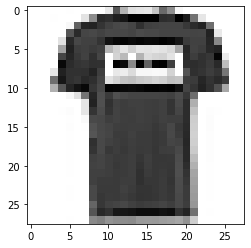

In [3]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9
img = 1
#img = X_trains[4].reshape(28, 28)
label_index = y_trains[img]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(X_trains[img], cmap='Greys')

In [4]:
data = X_trains[1].copy()
data[data>0]=1
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(str(data[i])))
text_image


['[0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0]',
 '[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0]',
 '[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0]',
 '[0 0 0

In [5]:
y_TrainOneHot = np_utils.to_categorical(y_trains) 
y_TestOneHot = np_utils.to_categorical(y_tests) 
y_TestOneHot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [6]:
X_train_2D = X_trains.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_tests.reshape(10000, 28*28).astype('float32')  
x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

In [7]:
# 建立簡單的線性執行的模型
model= keras.models.Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer="normal", activation='relu'))
model.add(Dense(units=10, kernel_initializer="normal", activation="softmax"))
#編譯損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#進行訓練
train_history=model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=25, batch_size=800, verbose=2)

Epoch 1/25


60/60 - 1s - loss: 0.8221 - accuracy: 0.7300 - val_loss: 0.5447 - val_accuracy: 0.8149


Epoch 2/25


60/60 - 1s - loss: 0.4931 - accuracy: 0.8313 - val_loss: 0.4620 - val_accuracy: 0.8409


Epoch 3/25


60/60 - 1s - loss: 0.4420 - accuracy: 0.8478 - val_loss: 0.4294 - val_accuracy: 0.8505


Epoch 4/25


60/60 - 1s - loss: 0.4060 - accuracy: 0.8598 - val_loss: 0.4096 - val_accuracy: 0.8586


Epoch 5/25


60/60 - 1s - loss: 0.3878 - accuracy: 0.8653 - val_loss: 0.4002 - val_accuracy: 0.8586


Epoch 6/25


60/60 - 1s - loss: 0.3680 - accuracy: 0.8726 - val_loss: 0.3927 - val_accuracy: 0.8627


Epoch 7/25


60/60 - 1s - loss: 0.3546 - accuracy: 0.8767 - val_loss: 0.3793 - val_accuracy: 0.8668


Epoch 8/25


60/60 - 1s - loss: 0.3406 - accuracy: 0.8807 - val_loss: 0.3668 - val_accuracy: 0.8727


Epoch 9/25


60/60 - 1s - loss: 0.3324 - accuracy: 0.8835 - val_loss: 0.3540 - val_accuracy: 0.8767


Epoch 10/25


60/60 - 1s - loss: 0.3223 - accuracy: 0.8866 - val_loss: 0.3684 - val_accuracy: 0.8722


Epoch 11/25


60/60 - 1s - loss: 0.3143 - accuracy: 0.8888 - val_loss: 0.3432 - val_accuracy: 0.8795


Epoch 12/25


60/60 - 1s - loss: 0.3001 - accuracy: 0.8926 - val_loss: 0.3398 - val_accuracy: 0.8822


Epoch 13/25


60/60 - 1s - loss: 0.2975 - accuracy: 0.8941 - val_loss: 0.3404 - val_accuracy: 0.8775


Epoch 14/25


60/60 - 1s - loss: 0.2902 - accuracy: 0.8960 - val_loss: 0.3316 - val_accuracy: 0.8822


Epoch 15/25


60/60 - 1s - loss: 0.2805 - accuracy: 0.8986 - val_loss: 0.3243 - val_accuracy: 0.8863


Epoch 16/25


60/60 - 1s - loss: 0.2744 - accuracy: 0.9024 - val_loss: 0.3332 - val_accuracy: 0.8798


Epoch 17/25


60/60 - 1s - loss: 0.2711 - accuracy: 0.9025 - val_loss: 0.3236 - val_accuracy: 0.8844


Epoch 18/25


60/60 - 1s - loss: 0.2670 - accuracy: 0.9046 - val_loss: 0.3176 - val_accuracy: 0.8858


Epoch 19/25


60/60 - 1s - loss: 0.2594 - accuracy: 0.9075 - val_loss: 0.3209 - val_accuracy: 0.8857


Epoch 20/25


60/60 - 1s - loss: 0.2539 - accuracy: 0.9086 - val_loss: 0.3208 - val_accuracy: 0.8847


Epoch 21/25


60/60 - 1s - loss: 0.2465 - accuracy: 0.9115 - val_loss: 0.3201 - val_accuracy: 0.8862


Epoch 22/25


60/60 - 1s - loss: 0.2463 - accuracy: 0.9115 - val_loss: 0.3147 - val_accuracy: 0.8878


Epoch 23/25


60/60 - 1s - loss: 0.2385 - accuracy: 0.9145 - val_loss: 0.3176 - val_accuracy: 0.8882


Epoch 24/25


60/60 - 1s - loss: 0.2412 - accuracy: 0.9133 - val_loss: 0.3369 - val_accuracy: 0.8814


Epoch 25/25


60/60 - 1s - loss: 0.2336 - accuracy: 0.9162 - val_loss: 0.3084 - val_accuracy: 0.8889


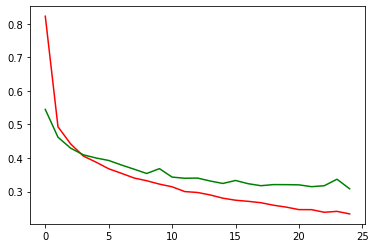

In [8]:
plt.plot(train_history.history["loss"], "r")
plt.plot(train_history.history["val_loss"], "g")

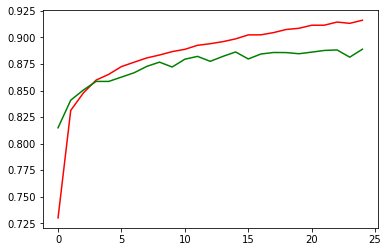

In [9]:
plt.plot(train_history.history["accuracy"], "r")
plt.plot(train_history.history["val_accuracy"], "g")

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
scores = model.evaluate(x_Test_norm, y_TestOneHot)   
print(f"準確度 = {scores[1]*100.0:2.1f}")

  1/313 [..............................] - ETA: 0s - loss: 0.2536 - accuracy: 0.9062

 34/313 [==>...........................] - ETA: 0s - loss: 0.3291 - accuracy: 0.8851

 65/313 [=====>........................] - ETA: 0s - loss: 0.3181 - accuracy: 0.8865

 96/313 [========>.....................] - ETA: 0s - loss: 0.3282 - accuracy: 0.8838

127/313 [===========>..................] - ETA: 0s - loss: 0.3409 - accuracy: 0.8814

160/313 [==============>...............] - ETA: 0s - loss: 0.3416 - accuracy: 0.8813

195/313 [=================>............] - ETA: 0s - loss: 0.3450 - accuracy: 0.8801

227/313 [====================>.........] - ETA: 0s - loss: 0.3422 - accuracy: 0.8809

259/313 [=======================>......] - ETA: 0s - loss: 0.3337 - accuracy: 0.8833

290/313 [==========================>...] - ETA: 0s - loss: 0.3355 - accuracy: 0.8831



313/313 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.8840


準確度 = 88.4
